In [2]:
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import numpy as np
from elosports.elo import Elo
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('nfl_games_all.csv')

In [4]:
df2020 = df[df.year_num == 2020]
df2020.head()

,Unnamed: 0,year_num,week_num,raw_data,winner_name,winner_score,loser_name,loser_score,is_tie
4608,4610,2020,1,"KC 34, HOU 20",KC,34.0,HOU,20.0,False
4609,4611,2020,1,"SEA 38, ATL 25",SEA,38.0,ATL,25.0,False
4610,4612,2020,1,"BUF 27, NYJ 17",BUF,27.0,NYJ,17.0,False
4611,4613,2020,1,"CHI 27, DET 23",CHI,27.0,DET,23.0,False
4612,4614,2020,1,"GB 43, MIN 34",GB,43.0,MIN,34.0,False


In [5]:
############### TEST ####################
# Instantiate League
eloLeague = Elo(k = 100) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for row in df2020.iterrows():
    eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)


In [6]:
for name in set(df['winner_name']):
    print(name, eloLeague.ratingDict[name])

LV 1235.2827619287136
LAR 1381.7084002846248
KC 1519.091315303166
TB 1279.5539504757958
IND 1343.4055357526954
NYG 1166.7170909786325
DAL 983.5082069821191
TEN 1417.023254977669
WSH 1083.731990152815
ATL 1226.0284754344468
HOU 1166.2275185406888
PHI 1050.9245579286273
ARI 1193.6402685412104
PIT 1573.737521716078
MIA 1306.4681215486728
NO 1492.361740611544
LAC 1003.8422025098961
CIN 1000.1580127198331
BAL 1237.661096875473
DET 1000.9836971919068
DEN 1182.8054248622448
CAR 1045.2371484270268
MIN 1205.7920098438876
GB 1249.8295059849993
NE 1187.6917758536727
NYJ 786.7748140575363
CHI 1120.1715904291755
SEA 1328.1958646987973
SF 1111.371979147653
CLE 1346.845709834421
JAX 820.9622843069716
BUF 1352.2661720990054


In [7]:
# Containers 
week_container = []
year_container = []
name_container = []
elo_container = []
teams = set(df['winner_name'])

# Instantiate League
eloLeague = Elo(k = 10) 

# Add Players
for name in set(df['winner_name']):
    eloLeague.addPlayer(name, rating = 1200)

for y in range (2002,2021):
    for w in range(1,18):
        
        # Subset to the week and year
        loop_df = df[(df.year_num == y) & (df.week_num == w) & (df.is_tie == False)]
        
        # Play games of the week
        for row in loop_df.iterrows():
            eloLeague.gameOver(winner=row[1]['winner_name'], loser=row[1]['loser_name'], winnerHome=0)
            
        # Get new Elos
        for name in teams:
            elo_container.append(eloLeague.ratingDict[name])
            name_container.append(name)
            week_container.append(w)
            year_container.append(y)
            
            
              

In [8]:
# dictionary of lists  
dict = {'year_num': year_container,
        'week_num': week_container,
        'year_week':[str(x) + '-' + str(y) for x,y in zip(year_container, week_container)],
        'team': name_container,
        'elo': elo_container
       }  
    
elos_df = pd.DataFrame(dict)

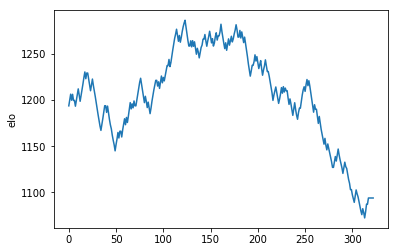

In [9]:
pats_df = elos_df[elos_df.team == 'NYG']
pats_df.reset_index(inplace=True)

sns.lineplot(x = pats_df.index, y=pats_df['elo'])


plt.show()

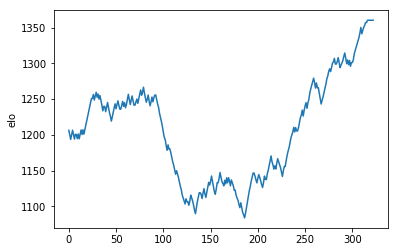

In [10]:
pats_df = elos_df[elos_df.team == 'KC']
pats_df.reset_index(inplace=True)


sns.lineplot(x = pats_df.index, y=pats_df['elo'])
plt.show()

In [11]:
elos_df[(elos_df.year_num == 2020) & (elos_df.week_num == 11)].sort_values('elo', ascending=False)

,year_num,week_num,year_week,team,elo
10136,2020,11,2020-11,NE,1418.948472
10125,2020,11,2020-11,PIT,1368.935554
10114,2020,11,2020-11,KC,1360.409485
10127,2020,11,2020-11,NO,1350.601697
10139,2020,11,2020-11,SEA,1323.553481
10130,2020,11,2020-11,BAL,1315.630578
10135,2020,11,2020-11,GB,1309.554834
10134,2020,11,2020-11,MIN,1247.497101
10123,2020,11,2020-11,PHI,1238.572364
10116,2020,11,2020-11,IND,1236.948198


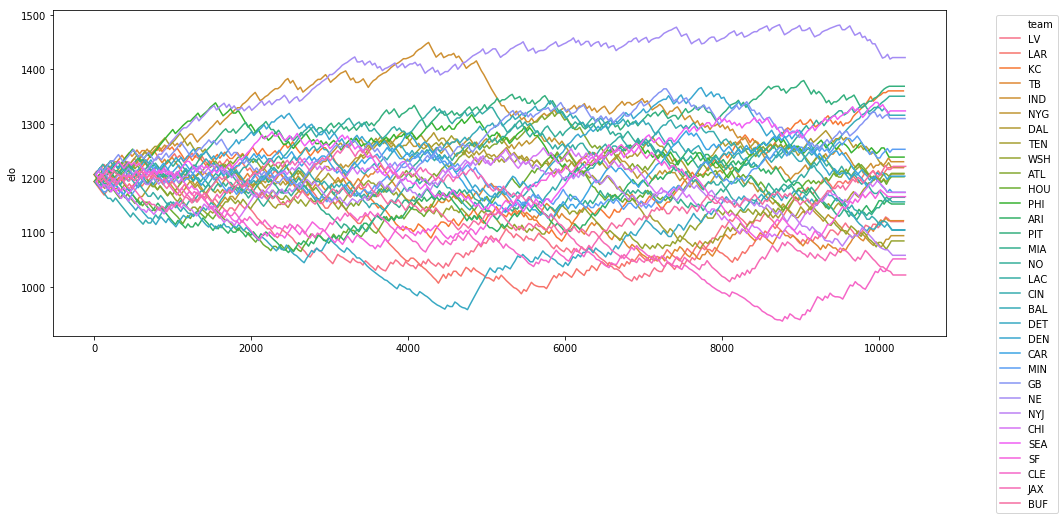

In [12]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=range(len(elos_df)), y='elo', data=elos_df, hue='team')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()